In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
def print_confusion_matrix(confusion_matrix, class_names, filename, figsize = (10,7), fontsize=14, integer=True):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    if integer == True:
        try:
            heatmap = sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
        except ValueError:
            raise ValueError("Confusion matrix values must be integers.")
    else:
        heatmap = sns.heatmap(df_cm, annot=True, cmap='Blues')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(filename + '.jpg', bbox_inches='tight')
    plt.pause(0.001)

In [3]:
num_classes = 10
conf_matrix = [0] * num_classes
with open('model_evaluation', 'r') as f:
    for i in range(num_classes):
        conf_matrix[i] = [0] * num_classes
        line = f.readline().replace('\n', '').split(', ')
        for j in range(num_classes):
            conf_matrix[i][j] = int(line[j])

In [4]:
normalized_conf_matrix = [0] * num_classes
for i in range(num_classes):
    normalized_conf_matrix[i] = [0] * num_classes
    for j in range(num_classes):
        normalized_conf_matrix[i][j] = 100 * conf_matrix[i][j] / np.asarray(conf_matrix[i]).sum()

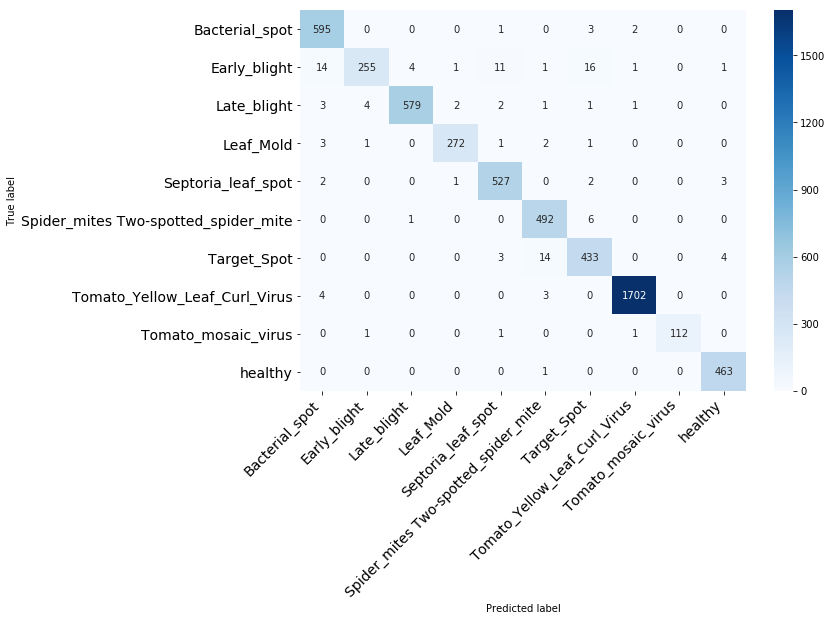

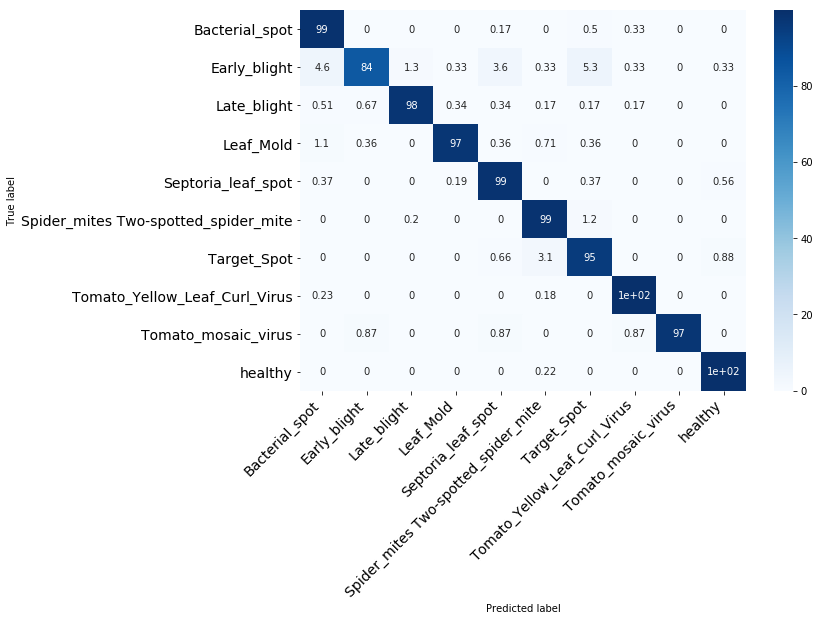

In [5]:
print_confusion_matrix(conf_matrix, sorted(os.listdir('../data/normal_test/')), 'conf_matrix')
print_confusion_matrix(normalized_conf_matrix, sorted(os.listdir('../data/normal_test/')), 'conf_matrix_norm', integer=False)